In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import h5py

In [5]:
data_dir = '/Users/ferasaltwal/Documents/DSI/Capstone/extracted-png-sorted-copy'
categories =  ['AD', 'CN']

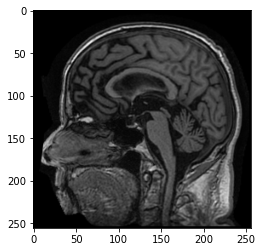

In [6]:
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [7]:
print(img_array.shape)

(256, 256)


In [8]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


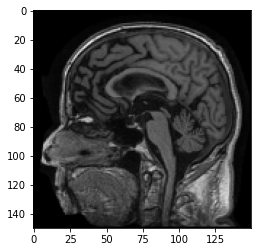

In [9]:
img_size = 150

new_arrray = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_arrray, cmap='gray')
plt.show()

In [10]:
print(new_arrray.shape)

(150, 150)


In [11]:
#adopted from sentdex keras tutuorial
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arrray = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_arrray, class_num])
            except Exception as e:
                pass

In [12]:
create_training_data()

100%|██████████| 5535/5535 [00:09<00:00, 571.75it/s]


In [13]:
print(len(training_data))

10209


In [14]:
import random

random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
1
0
0
1
0


In [26]:
X = []
y = []

In [27]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [28]:
# import pickle
# pickle_out = open('X.pickle', 'wb')
# pickle.dump(X, pickle_out)
# pickle_out.close()

In [29]:
#this is how you load the model if needed
# X = pickle.load(open('X.pickle', 'rb'))

In [30]:
X = X/255.0

In [31]:
y = np.array(y)

In [32]:
# from tensorflow.keras.utils import to_categorical
# y = to_categorical(y, 3)

In [33]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X, y, batch_size=200, epochs = 5, validation_split=0.2)

Epoch 1/5
41/41 [==============================] - 254s 6s/step - loss: 0.6889 - accuracy: 0.5689 - val_loss: 0.6194 - val_accuracy: 0.7042
Epoch 2/5
41/41 [==============================] - 212s 5s/step - loss: 0.4892 - accuracy: 0.7664 - val_loss: 0.3419 - val_accuracy: 0.8536
Epoch 3/5
41/41 [==============================] - 186s 5s/step - loss: 0.2421 - accuracy: 0.9094 - val_loss: 0.1894 - val_accuracy: 0.9314
Epoch 4/5
41/41 [==============================] - 193s 5s/step - loss: 0.1242 - accuracy: 0.9541 - val_loss: 0.0757 - val_accuracy: 0.9765
Epoch 5/5
41/41 [==============================] - 185s 5s/step - loss: 0.0460 - accuracy: 0.9871 - val_loss: 0.0357 - val_accuracy: 0.9907


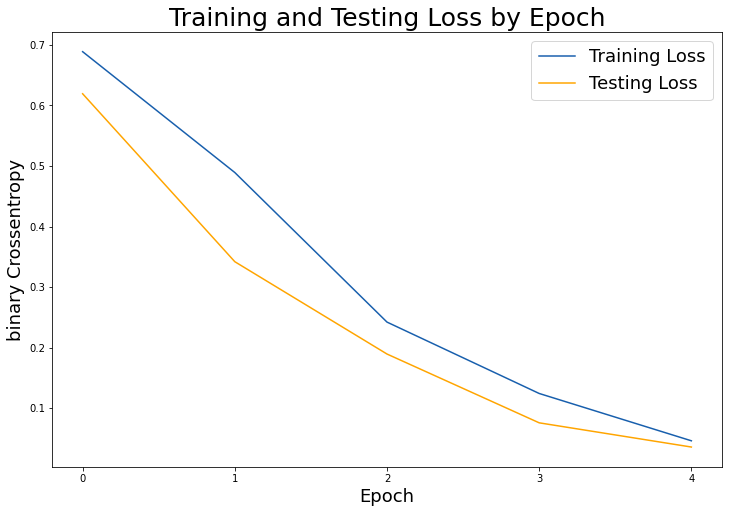

In [36]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('binary Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

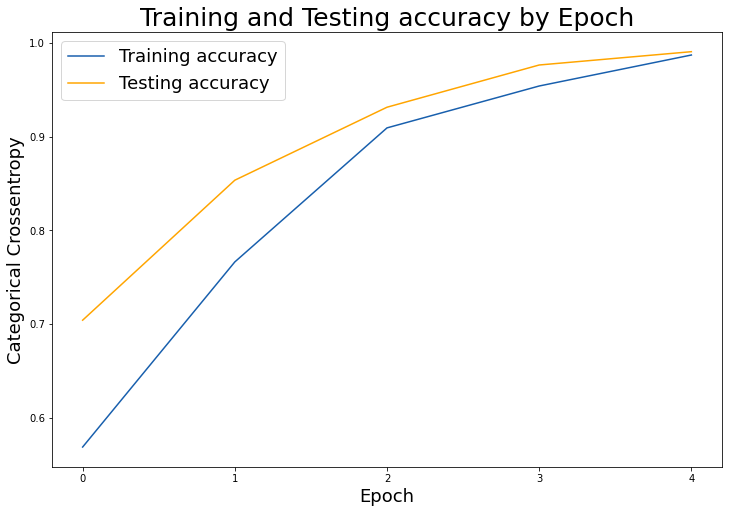

In [37]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training accuracy', color='#185fad')
plt.plot(test_acc, label='Testing accuracy', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [28]:
# model.save('second_3_class_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: second_3_class_model/assets


----
**Let's try predicting images that the model was not trained on**

In [39]:
categories

['AD', 'CN']

In [42]:
#let's write a function to preprocess new images to feed into the model
def prepare_img(filepath):
    img_size = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

In [43]:
test_path = '/Users/ferasaltwal/Documents/DSI/Capstone/Capstone-DSIR-824/test-img'

In [44]:
prediction = model.predict([prepare_img(os.path.join(test_path, 'CN2.png'))])

In [45]:
prediction[0][0]

1.0

In [46]:
if prediction[0][0] == 1:
    print('AD')
elif prediction[0][1] == 1:
    print('MCI')
elif prediction[0][2] == 1:
    print('CN')

AD


In [59]:
path_AD_test = '/Users/ferasaltwal/Documents/DSI/Capstone/test_images-copy/png_sorted/AD'
path_CN_test = '/Users/ferasaltwal/Documents/DSI/Capstone/test_images-copy/png_sorted/CN'

In [60]:
pred_list_AD = []
for img in os.listdir(path_AD_test):
    if img != '.DS_Store':
        prediction = model.predict([prepare_img(os.path.join(path_AD_test, img))])
        if int(prediction[0][0]) == 0:
            pred_list_AD.append('AD')
#         elif prediction[0][1] == 1:
#             pred_list.append('MCI')
        elif int(prediction[0][0]) == 1:
            pred_list_AD.append('CN')

In [61]:
len(pred_list_AD)

1476

In [62]:
pred_list_AD.count('AD')

858

In [63]:
pred_list_AD.count('CN')

618

In [64]:
858/1476

0.5813008130081301

In [78]:
pred_list_CN = []
for img in os.listdir(path_CN_test):
    if img != '.DS_Store':
        prediction = model.predict([prepare_img(os.path.join(path_CN_test, img))])
        if int(prediction[0][0]) == 0:
            pred_list_CN.append('AD')
#         elif prediction[0][1] == 1:
#             pred_list.append('MCI')
        elif int(prediction[0][0]) == 1:
            pred_list_CN.append('CN')

In [79]:
len(pred_list_CN)

1638

In [80]:
pred_list_CN.count('AD')

695

In [81]:
pred_list_CN.count('CN')

943

In [83]:
943/1638

0.5757020757020757